In [316]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [317]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [318]:
from prophet import Prophet

In [319]:
data = pd.read_csv('../data/master.csv')
data.shape

(15214, 33)

In [320]:
def extract_date(data):
    date, _ = data.split(' ')
    return date

In [321]:
data['date'] = data['timestamp'].apply(lambda x : extract_date(x))
data['date'] =  pd.to_datetime(data['date'])
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [322]:
data.T.head(20)

,0,1,2,3,4,5,6,7,8,9,...,15204,15205,15206,15207,15208,15209,15210,15211,15212,15213
Case-Id,232,425,728,978,11,40,46,51,67,68,...,1047,1048,1048,1048,1049,1049,1049,1049,1049,1049
Case-concept:name,XH,JP,ABA,QKA,K,NaN,TA,YA,OB,PB,...,INA,JNA,JNA,JNA,KNA,KNA,KNA,KNA,KNA,KNA
Event-Id,3078,6195,10599,14200,132,455,521,562,746,760,...,15193,15194,15195,15196,15197,15198,15199,15203,15204,15205
sorting,20,5,6,4,6,14,8,4,14,12,...,3,1,2,3,1,2,3,7,8,9
timestamp,2014-03-27 09:00:00,2014-05-03 18:26:00,2014-10-12 10:10:00,2013-11-16 08:21:00,2014-02-23 21:15:00,2014-11-13 06:00:00,2014-08-10 06:00:00,2014-07-10 10:54:00,2014-12-12 06:00:00,2015-01-19 10:00:00,...,2014-11-03 09:45:51,2014-11-12 16:40:19,2014-11-12 16:47:25,2014-11-12 16:47:39,2014-12-11 22:28:38,2014-12-11 22:52:48,2014-12-11 22:53:16,2014-12-12 04:03:38,2014-12-12 04:03:43,2014-12-12 04:06:38
Event-Name,CRP,CRP,Leucocytes,Leucocytes,Leucocytes,Leucocytes,Leucocytes,Leucocytes,Leucocytes,Leucocytes,...,ER Sepsis Triage,ER Registration,ER Triage,ER Sepsis Triage,ER Registration,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC
org:group,B,B,B,B,B,B,B,B,B,B,...,A,A,C,A,A,C,A,A,A,Q
age,90,35,75,85,50,90,80,90,80,80,...,25,40,40,40,35,35,35,35,35,35
crp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diagnose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,QE,NaN,NaN,NaN,NaN,NaN


In [323]:
columns_select = ['date', 'Case-Id', 'sorting']
df = data[columns_select]
df.head()

,date,Case-Id,sorting
0,2014-03-27,232,20
1,2014-05-03,425,5
2,2014-10-12,728,6
3,2013-11-16,978,4
4,2014-02-23,11,6


In [324]:
df = df[df['sorting'] == 1]

In [325]:
df = df.drop('sorting', axis=1)

In [326]:
df  = df.groupby('date').agg(['count'])
df = df.reset_index()
df.head()

,date,Case-Id
,,count
0,2013-11-07,1
1,2013-11-09,2
2,2013-11-11,1
3,2013-11-12,1
4,2013-11-13,2


In [335]:
df.columns = ['ds', 'y']
start_date = '2014-01-01'
end_date =  '2015-03-01'
mask = (df['ds'] > start_date) & (df['ds'] <= end_date)
df = df.loc[mask]

In [336]:
df.head()

,ds,y
44,2014-01-02,2
45,2014-01-04,5
46,2014-01-05,2
47,2014-01-06,3
48,2014-01-07,1


In [337]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [338]:
m = Prophet()
m.fit(df)

In [339]:
future = m.make_future_dataframe(periods=7)
#future.tail()

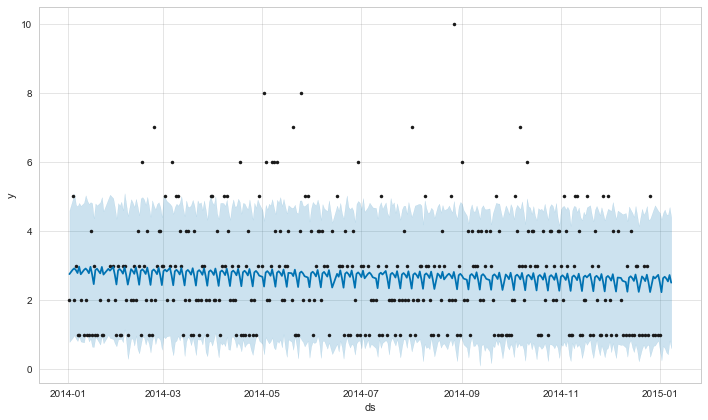

In [340]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast);

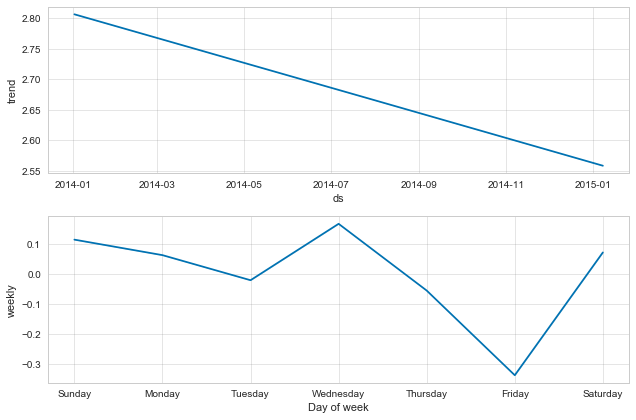

In [341]:
m.plot_components(forecast);

In [342]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = '7 days')

In [343]:
df_cv.head(7)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-27,1.817648,0.497338,3.099888,3,2014-01-26 12:00:00
1,2014-01-29,1.859845,0.556582,3.130079,3,2014-01-26 12:00:00
2,2014-01-30,1.351300,0.065707,2.561901,2,2014-01-26 12:00:00
3,2014-01-31,2.153488,0.919232,3.445045,1,2014-01-26 12:00:00
4,2014-02-01,2.091802,0.808081,3.360383,3,2014-01-26 12:00:00
5,2014-02-02,1.606301,0.419762,2.873335,1,2014-01-26 12:00:00
6,2014-01-31,2.171071,0.928474,3.507562,1,2014-01-30 00:00:00
